In [ ]:
text = """
Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] Recently, artificial neural networks have been able to surpass many previous approaches in performance.[2][3]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[4][5] When applied to business problems, it is known under the name predictive analytics. Although not all machine learning is statistically based, computational statistics is an important source of the field's methods.
The mathematical foundations of ML are provided by mathematical optimization (mathematical programming) methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis (EDA) through unsupervised learning.[7][8]
From a theoretical viewpoint, probably approximately correct (PAC) learning provides a framework for describing machine learning.

"""

In [ ]:
import nltk
nltk.download('punkt')
import numpy as np
np.random.seed(42)
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tokens = word_tokenize(text)

In [ ]:
# tokens

In [ ]:
def mapping(tokes):
  word_to_id = {}
  id_to_word = {}

  for i, token in enumerate(set(tokens)):
    word_to_id[token] = i
    id_to_word[i] = token

  return word_to_id, id_to_word

In [ ]:
word_to_id, id_to_word = mapping(tokens)

In [ ]:
# id_to_word

In [ ]:
len(word_to_id)

124

In [ ]:
def one_hot_encode(id, vocab_size):
  res = [0] * vocab_size
  res[id] = 1
  return res

In [ ]:
def generate_training_data(tokens, word_to_id, window):
  X = []
  Y = []

  n_tokens = len(tokens)
  for i in range(n_tokens):
    idx = range(max(0, i - window), min(n_tokens, i+window+1))

    for j in idx:
      if i == j:
        continue
      X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
      Y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

  return np.asarray(X), np.asarray(Y)




In [ ]:
X, Y = generate_training_data(tokens, word_to_id, 2)

In [ ]:
Y[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
def initiate_network(vocab_size, n_embeddings):
  matrix = {
      'w1': np.random.randn(vocab_size, n_embeddings),
      "w2": np.random.randn(n_embeddings, vocab_size)

  }
  return matrix

In [ ]:
matrix = initiate_network(len(word_to_id), 10)

In [ ]:
def forward(model, X, return_cashe=True):
  cashe = {}
  cashe['a1'] = X @ model['w1']
  cashe['a2'] = cashe['a1'] @ model['w2']
  cashe['z'] = softmax(cashe['a2'])

  if not return_cashe:
    return cashe['z']
  return cashe

In [ ]:
def softmax(X):
  result = []
  for x in X:
    exp = np.exp(x)
    result.append(exp/exp.sum())

  return result

In [ ]:
def cross_entropy(z, y):
  return -np.sum(np.log(z) * y)

In [ ]:
def backward(model, X, y, alpha):
  cashe = forward(model, X)
  da2 = cashe['z'] - Y
  dw2 = cashe['a1'].T@ da2
  da1 = da2 @ model["w2"].T
  dw1 = X.T @ da1

  model['w1'] -=alpha * dw1
  model['w2'] -=alpha * dw2

  return cross_entropy(cashe['z'], Y)

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

<ipython-input-35-974b3de0c2e2>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
n_iter = 50
learning_rate = 0.05

In [ ]:
history = [backward(matrix, X, Y, learning_rate) for _ in range(n_iter)]

<function matplotlib.pyplot.show(close=None, block=None)>

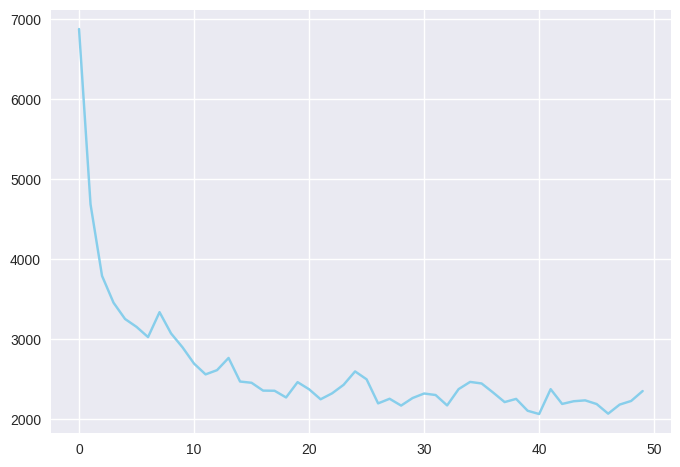

In [ ]:
plt.plot(range(len(history)), history, color='skyblue')
plt.show


In [ ]:
learning = one_hot_encode(word_to_id['learning'], len(word_to_id))

In [ ]:
result = forward(matrix, [learning], return_cashe = False)[0]

In [ ]:
for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
  print(word)

is
describing
all
a
learning
machine
provides
statistically
unsupervised
PAC
ML
Machine
)
through
for
(
[
.
not
Data
methods
mining
parallel
computational
EDA
correct
programming
probably
able
mathematical
framework
]
networks
business
application
it
previous
8
approximately
7
2
based
4
foundations
computer
3
From
When
finds
an
5
have
instructions
The
natural
fields
provided
statistics
are
to
many
applied
neural
related
performance
optimization
1
medicine
theoretical
language
by
speech
been
explicit
approaches
processing
Recently
including
viewpoint
Although
surpass
algorithms
vision
field
under
analytics
agriculture
without
study
learn
of
's
email
tasks
from
that
important
recognition
problems
known
source
name
on
unseen
thus
filtering
exploratory
analysis
can
perform
,
generalize
predictive
in
statistical
intelligence
data
artificial
the
focusing
concerned
development
and
with
